<h1>New York City Restaurant Inspection Data</h1>
<h3>This dataset provides restaurant inspections, violations, grades and adjudication information.</h3>

NAVIGATING THE NYC RESTAURANT ABC GRADING SYSTEM
<li>0-13 Deficiency Points = "A"
<li>14-27 Deficiency Points = "B"
<li>28+ Deficiency Points = "C"

In [1]:
import pandas as pd
import numpy as np
df=pd.read_csv("/Users/xshen/Downloads/DOHMH_New_York_City_Restaurant_Inspection_Results.csv")

/anaconda/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


<li>delete useless columns ('PHONE','RECORD DATE')
<li>choose only records in 2017
<li>combine information recorded in several rows of every single restaurant into one row, so every row represent a unique restaurant

In [2]:
def data_cleansing():
    df2=df.drop(['PHONE','RECORD DATE'],axis=1)#drop useless columns: 'PHONE','RECORD DATE'
    sub1=df2.loc[df2['GRADE DATE'].str.contains('2017')==True]#only keep rows with grade date in 2017
    sub2=sub1.sort_index(by='CAMIS')#sort by restaurant code
    sub2
    
    datanp=np.array(sub2)
    data2=[]
    id=datanp[0][0]
    data2.append(datanp[0])
    for i in range(1,len(datanp)):
        if datanp[i][0]==id:
            data2[-1][9]='%s%s%s' % (data2[-1][9], ',', datanp[i][9])
            data2[-1][10]='%s%s%s' % (data2[-1][10],' ', datanp[i][10])
            if data2[-1][11]=='Not Critical':
                data2[-1][11]=datanp[i][11]
        else:
            data2.append(datanp[i])
        id=datanp[i][0]
        
    sub3 = pd.DataFrame(data2)
    sub3.columns=['CAMIS','DBA','BORO','BUILDING','STREET','ZIPCODE','CUISINE','INSPECTION DATE','ACTION','VIOLATION CODE','VIOLATION DESCRIPTION','CRITICAL FLAG','SCORE','GRADE','GRADE DATE','INSPECTION TYPE']
    
    #some restaurants have more than one type of violation, and they are recorded in several rows
    #since we want each restaurant keep information in one raw, we take information from several to combine into one row
    #combined information includes: VIOLATION CODE, VIOLATION DESCRIPTION, VIOLATION DESCRIPTION
    
    sub3.set_index('DBA',inplace=True)
    sub4=sub3[sub3.GRADE != 'Not Yet Graded']#delete rows which has not yet been graded
    sub4=sub4[sub4.GRADE != 'Z']
    sub4=sub4[sub4.GRADE != 'P']
    sub4 = sub4[sub4.BORO != 'Missing']
    sub4 = sub4.dropna(how='any')
    return sub4
r_data=data_cleansing()

/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:4: FutureWarning: by argument to sort_index is deprecated, pls use .sort_values(by=...)
  after removing the cwd from sys.path.


In [4]:
r_data.head()

,CAMIS,BORO,BUILDING,STREET,ZIPCODE,CUISINE,INSPECTION DATE,ACTION,VIOLATION CODE,VIOLATION DESCRIPTION,CRITICAL FLAG,SCORE,GRADE,GRADE DATE,INSPECTION TYPE
DBA,,,,,,,,,,,,,,,
MORRIS PARK BAKE SHOP,30075445,BRONX,1007,MORRIS PARK AVE,10462.0,Bakery,05/18/2017,Violations were cited in the following area(s).,"06D,10F","Food contact surface not properly washed, rins...",Critical,7.0,A,05/18/2017,Cycle Inspection / Initial Inspection
WENDY'S,30112340,BROOKLYN,469,FLATBUSH AVENUE,11225.0,Hamburgers,10/06/2017,Violations were cited in the following area(s).,"10F,04H",Non-food contact surface improperly constructe...,Critical,10.0,A,10/06/2017,Cycle Inspection / Re-inspection
RIVIERA CATERERS,40356018,BROOKLYN,2780,STILLWELL AVENUE,11224.0,American,07/20/2017,Violations were cited in the following area(s).,"10B,10F,06C",Plumbing not properly installed or maintained;...,Critical,13.0,A,07/20/2017,Cycle Inspection / Initial Inspection
BRUNOS ON THE BOULEVARD,40356151,QUEENS,8825,ASTORIA BOULEVARD,11369.0,American,08/19/2017,Violations were cited in the following area(s).,"10F,06C",Non-food contact surface improperly constructe...,Critical,10.0,A,08/19/2017,Cycle Inspection / Initial Inspection
WILKEN'S FINE FOOD,40356483,BROOKLYN,7114,AVENUE U,11234.0,Delicatessen,06/03/2017,Violations were cited in the following area(s).,"08A,09A,04L",Facility not vermin proof. Harborage or condit...,Critical,13.0,A,06/03/2017,Cycle Inspection / Initial Inspection


<h2>Data Visualization

<h3>Total number of restaurants received inspection in NYC grouped by borough

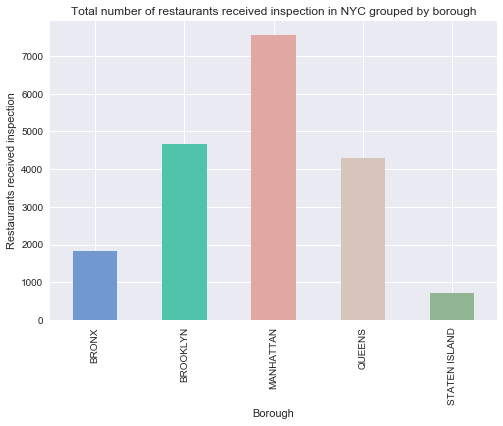

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

data=r_data
colors = ["#7199cf", "#4fc4aa", "#e1a7a2","#D7C4BB","#91B493"]
plt.style.use('seaborn')
borough_group = data.groupby('BORO')
borough_group.size().plot(kind='bar',color = colors)
plt.xlabel('Borough') 
plt.ylabel('Restaurants received inspection') 
plt.title('Total number of restaurants received inspection in NYC grouped by borough') 
plt.show()

In [6]:
grouped_by_grade= data.groupby('GRADE')
print(grouped_by_grade.size())

GRADE
A    17376
B     1408
C      283
dtype: int64


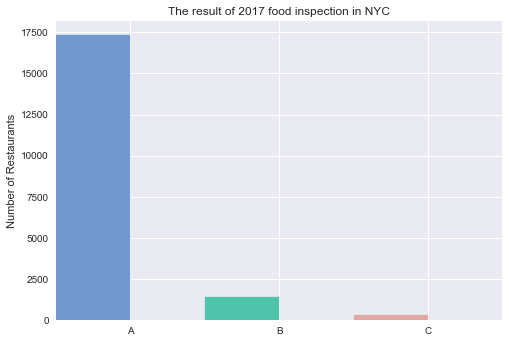

In [7]:
alldata = {
    'A': (17337, '#7199cf'),
    'B': (1407, '#4fc4aa'),
    'C': (283, '#e1a7a2')
}

fig=plt.figure('Bar chart')

ax=fig.add_subplot(111)
ax.set_title("The result of 2017 food inspection in NYC")
xticks=np.arange(3)
bar_width=0.5
a=alldata.keys()
s=[x[0] for x in alldata.values()]
colors=[x[1] for x in alldata.values()]
bars=ax.bar(xticks,s,width=bar_width,edgecolor='none')
ax.set_ylabel('Number of Restaurants')
ax.set_xticks(xticks+bar_width/2)
ax.set_xticklabels(a)
ax.set_xlim([bar_width/2-0.5,3-bar_width/2])
for bar,color in zip(bars,colors):
    bar.set_color(color)
plt.show()

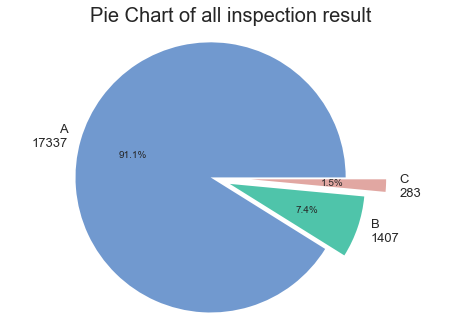

In [8]:
import matplotlib as mpl
mpl.rcParams['axes.titlesize'] = 20
mpl.rcParams['xtick.labelsize'] = 13
mpl.rcParams['ytick.labelsize'] = 13
mpl.rcParams['axes.labelsize'] = 13
mpl.rcParams['xtick.major.size'] = 0
mpl.rcParams['ytick.major.size'] = 0

alldata = {
    'A': (17337, '#7199cf'),
    'B': (1407, '#4fc4aa'),
    'C': (283, '#e1a7a2')
}

a=alldata.keys()

s=[x[0] for x in alldata.values()]

fig=plt.figure('Bar chart')

ax=fig.add_subplot(111)
ax.set_title('Pie Chart of all inspection result')
labels=['{}\n{}'.format(a,s) for a,s in zip(a,s)]

ax.pie(s,labels=labels,colors=colors,autopct='%1.1f%%',explode=(0, 0.15, 0.3))
ax.axis("equal")

plt.show()

In [9]:
grade_borough = data.groupby(['BORO', 'GRADE']).size().unstack()
grade_borough

GRADE,A,B,C
BORO,,,
BRONX,1641,142,35
BROOKLYN,4271,340,68
MANHATTAN,6923,524,106
QUEENS,3902,337,63
STATEN ISLAND,639,65,11


Text(0,0.5,'Number of Restaurants')

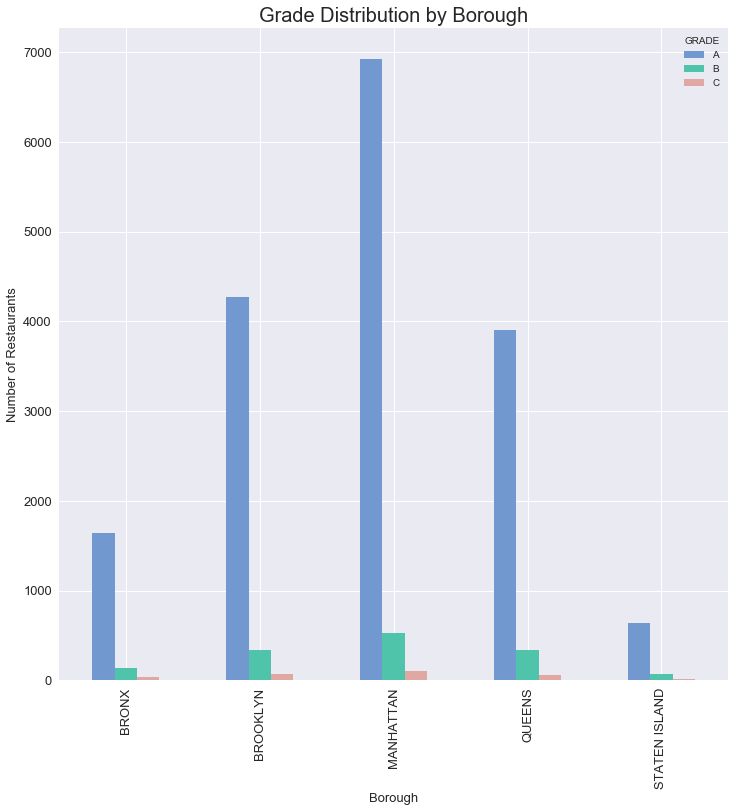

In [10]:
colors = ["#7199cf", "#4fc4aa", "#e1a7a2"]
grade_borough = data.groupby(['BORO','GRADE'])
ax = grade_borough.size().unstack().plot(kind='bar',color= colors,title="Grade Distribution by Borough",figsize=(12,12))
# Set the x-axis label
ax.set_xlabel("Borough")

# Set the y-axis label
ax.set_ylabel("Number of Restaurants")

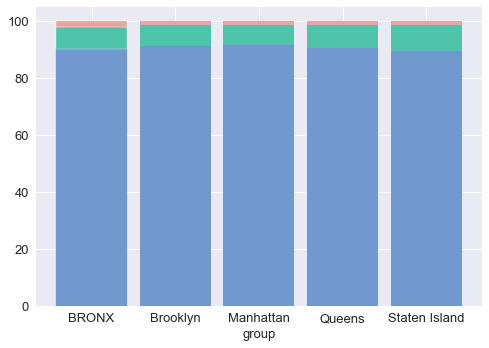

In [11]:
# libraries
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc
import pandas as pd
 
# Data
r = [0,1,2,3,4]
raw_data = {'greenBars': [1638, 4261, 6901, 3898, 639], 'orangeBars': [142, 339, 524, 337, 65],'blueBars': [35, 68, 106, 63, 11]}
df = pd.DataFrame(raw_data)
 
# From raw value to percentage
totals = [i+j+k for i,j,k in zip(df['greenBars'], df['orangeBars'], df['blueBars'])]
greenBars = [i / j * 100 for i,j in zip(df['greenBars'], totals)]
orangeBars = [i / j * 100 for i,j in zip(df['orangeBars'], totals)]
blueBars = [i / j * 100 for i,j in zip(df['blueBars'], totals)]
 
# plot
barWidth = 0.85
names = ('BRONX','Brooklyn','Manhattan','Queens','Staten Island')
# Create green Bars
plt.bar(r, greenBars, color='#7199cf', edgecolor='#7199cf', width=barWidth)
# Create orange Bars
plt.bar(r, orangeBars, bottom=greenBars, color='#4fc4aa', edgecolor='white', width=barWidth)
# Create blue Bars
plt.bar(r, blueBars, bottom=[i+j for i,j in zip(greenBars, orangeBars)], color='#e1a7a2', edgecolor='white', width=barWidth)
 
# Custom x axis
plt.xticks(r, names)
plt.xlabel("group")
 
# Show graphic
plt.show()

In [14]:
data_big5_cuisine = data[(data.CUISINE == 'American')|(data.CUISINE == 'Chinese')|(data.CUISINE == 'CafÃ©/Coffee/Tea')|(data.CUISINE  == 'Pizza')|(data.CUISINE == 'Italian')]

Text(0,0.5,'Number of Restaurants')

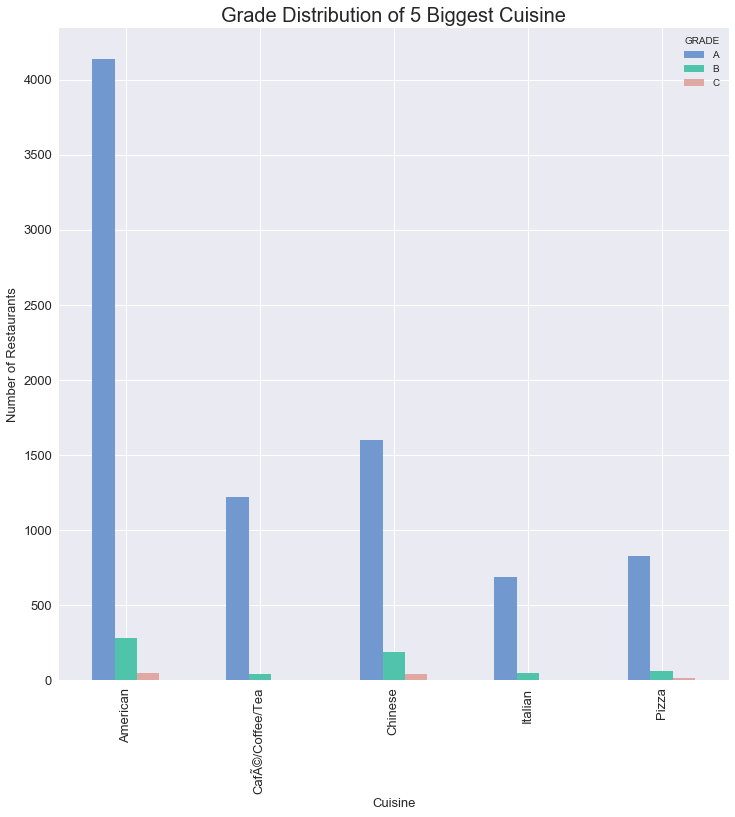

In [15]:
colors = ["#7199cf", "#4fc4aa", "#e1a7a2"]
grade_cuisine_biggest_five = data_big5_cuisine.groupby(['CUISINE','GRADE'])
ax = grade_cuisine_biggest_five.size().unstack().plot(kind='bar',color=colors, title="Grade Distribution of 5 Biggest Cuisine",figsize=(12,12))

# Set the x-axis label
ax.set_xlabel("Cuisine")
# Set the y-axis label
ax.set_ylabel("Number of Restaurants")

In [16]:
grade_cuisine_biggest_five.size().unstack()

GRADE,A,B,C
CUISINE,,,
American,4136,284,49
CafÃ©/Coffee/Tea,1218,41,4
Chinese,1601,188,41
Italian,686,49,6
Pizza,826,61,14


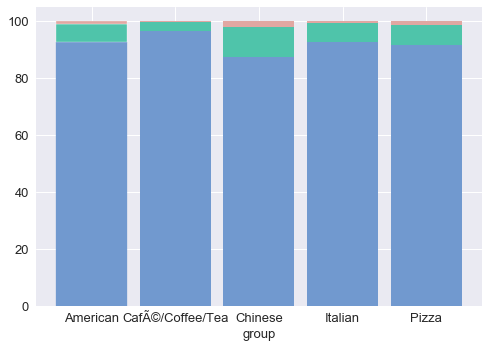

In [17]:
# libraries
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc
import pandas as pd
 
# Data
r = [0,1,2,3,4]
raw_data = {'greenBars': [4132, 1210, 1597, 686, 825], 'orangeBars': [284, 41, 188, 49, 61],'blueBars': [49, 4, 41, 6, 14]}
df = pd.DataFrame(raw_data)
 
# From raw value to percentage
totals = [i+j+k for i,j,k in zip(df['greenBars'], df['orangeBars'], df['blueBars'])]
greenBars = [i / j * 100 for i,j in zip(df['greenBars'], totals)]
orangeBars = [i / j * 100 for i,j in zip(df['orangeBars'], totals)]
blueBars = [i / j * 100 for i,j in zip(df['blueBars'], totals)]
 
# plot
barWidth = 0.85
names = ('American','CafÃ©/Coffee/Tea','Chinese','Italian','Pizza')
# Create green Bars
plt.bar(r, greenBars, color='#7199cf', edgecolor='#7199cf', width=barWidth)
# Create orange Bars
plt.bar(r, orangeBars, bottom=greenBars, color='#4fc4aa', edgecolor='white', width=barWidth)
# Create blue Bars
plt.bar(r, blueBars, bottom=[i+j for i,j in zip(greenBars, orangeBars)], color='#e1a7a2', edgecolor='white', width=barWidth)
 
# Custom x axis
plt.xticks(r, names)
plt.xlabel("group")
 
# Show graphic
plt.show()

<h3>Mapping

In [429]:
#Be careful! Don't run this kernel
import requests

APIKEY = ""
def return_lat_long(address):
    url = 'https://maps.googleapis.com/maps/api/geocode/json?key={0}&address={1},NY&region=us'.format(APIKEY,address)
    response= requests.request('get',url)
    if response.status_code == 200:
        if response.json()['results']:
            results = response.json()['results'][0]
            lat = results['geometry']['location']['lat']
            lng = results['geometry']['location']['lng']   
        else:
            lat = ''
            lng = ''
            
        result = {'latitude':lat,'longitude':lng}
    else:
        return 'WRONG URL'
    return result
    

#Build a dataframe with latitude and longitude
map_address = pd.DataFrame({'address':data.loc[:,'BUILDING']+' '+data.loc[:,'STREET'],'grade':data['GRADE']})
map_address['latitude'] = np.nan
map_address['longitude'] = np.nan

#get latitude and longitude from google geocode
for n in range(len(map_address)):
    address = map_address.iloc[n,0]
    result = return_lat_long(address)
    map_address.iloc[n,2] = result['latitude']
    map_address.iloc[n,3] = result['longitude']

map_address.to_csv('map_data.csv',index=True,header=True)

In [4]:
import pandas as pd
map_address = pd.read_csv('/Users/xshen/Desktop/map_data.csv')
map_address = map_address.dropna(how='any')
map_address.head()

,DBA,address,grade,latitude,longitude
0,MORRIS PARK BAKE SHOP,1007 MORRIS PARK AVE,A,40.848432,-73.856035
1,WENDY'S,469 FLATBUSH AVENUE,A,40.662921,-73.961727
2,RIVIERA CATERERS,2780 STILLWELL AVENUE,A,40.579526,-73.982425
3,BRUNOS ON THE BOULEVARD,8825 ASTORIA BOULEVARD,A,40.764312,-73.880383
4,WILKEN'S FINE FOOD,7114 AVENUE U,A,40.619893,-73.906840


In [6]:
map_address_c = map_address[map_address['grade']=='C']
map_address_a = map_address[map_address['grade']=='A']
map_address_b = map_address[map_address['grade']=='B']

name_a = [name for name in map_address_a['DBA']]
name_b = [name for name in map_address_b['DBA']]
name_c = [name for name in map_address_c['DBA']]
lat_a = [lat for lat in map_address_a['latitude']]
lat_b = [lat for lat in map_address_b['latitude']]
lat_c = [lat for lat in map_address_c['latitude']]
lng_a = [lng for lng in map_address_a['longitude']]
lng_b = [lng for lng in map_address_b['longitude']]
lng_c = [lng for lng in map_address_c['longitude']]

In [9]:
import plotly.plotly as py
from plotly.graph_objs import *

import plotly

plotly.tools.set_credentials_file(username='gzsuyu', api_key='H0TlYl3cnDnLKxeTe4Y7')

mapbox_access_token = 'pk.eyJ1IjoiZ3pzdXl1IiwiYSI6ImNqYXNzZjI1bzR3eDYzM3BkOWdmMjJoajkifQ.e2xhQQ-3B88av-NJeUXb4Q'

data = Data([
    Scattermapbox(lat=lat_a,lon=lng_a,mode='markers',marker=Marker(size=3,color='green'),text=name_a,),
    Scattermapbox(lat=lat_b,lon=lng_b,mode='markers',marker=Marker(size=3.5,color='orange'),text=name_b,),
    Scattermapbox(lat=lat_c,lon=lng_c,mode='markers',marker=Marker(size=4,color='red'),text=name_c,)
])

layout = Layout(autosize=True,hovermode='closest',mapbox=dict(accesstoken= mapbox_access_token,bearing=0,center=dict(lat=40.84,lon=-73.87),pitch=0,zoom=12),)

fig = dict(data=data, layout=layout)
py.iplot(fig, filename='Multiple Mapbox')

<h3>Analyze with Yelp
<h4>How about the restaurants in 'C-level'? Yelp learn you more.

In [29]:
import urllib
from urllib.error import HTTPError
from urllib.parse import quote
from urllib.parse import urlencode
import requests
import numpy as np

CLIENT_ID = 'fwYc0KEvY0ZPV9k8kKgmiQ'
CLIENT_SECRET = 'uTSakrzQLLvN6bVZT29Y534yUZwvZrq0kyNEGtpc4lbMv900ccJ6PWvrFZS6b5YG'

#default
API_HOST = 'https://api.yelp.com'
SEARCH_PATH = '/v3/businesses/search'
BUSINESS_PATH = '/v3/businesses/'  
TOKEN_PATH = '/oauth2/token'
GRANT_TYPE = 'client_credentials'



def obtain_bearer_token(host, path):
    url = '{0}{1}'.format(host, quote(path.encode('utf8')))
    data = urlencode({
        'client_id': CLIENT_ID,
        'client_secret': CLIENT_SECRET,
        'grant_type': GRANT_TYPE,
    })
    headers = {
        'content-type': 'application/x-www-form-urlencoded',
    }
    response = requests.request('POST', url, data=data, headers=headers)
    bearer_token = response.json()['access_token']
    return bearer_token

#we get bearer token here
bearer_token = obtain_bearer_token(API_HOST, TOKEN_PATH)

def request(host, path, bearer_token, url_params=None):
    url_params = url_params or {}
    url = '{0}{1}'.format(host, quote(path.encode('utf8')))
    headers = {
        'Authorization': 'Bearer %s' % bearer_token,
    }
    response = requests.request('GET', url, headers=headers, params=url_params)

    return response.json()


def search(bearer_token, term, location):
    url_params = {
        'term': term.replace(' ', '+'),
        'location': location.replace(' ', '+'),
        'limit': 2 #just need the first one...
    }
    
    return request(API_HOST, SEARCH_PATH, bearer_token, url_params=url_params)


def get_data(result):
    try:
        price = result_yelp['price']
    except:
        price = np.nan
    name = result_yelp['name']
    business_id = result_yelp['id']
    rating = result_yelp['rating']
    review_num = result_yelp['review_count']
    return [name,business_id,price,rating,review_num]

In [69]:
a_yelpdata = list()

#get data from Yelp
for name,address in zip(map_address_a['DBA'],map_address_a['address']): #a,b,c
    address += ',NY'
    response = search(bearer_token, name, address)
    if response['businesses']:
        result_yelp = response['businesses'][0]
        result_list = get_data(result_yelp)        
    else:
        result_list= []
    a_yelpdata.append(result_list)

#create a dataframe named c_yelp
a_yelp = pd.DataFrame(a_yelpdata,columns = ['name','id','price','rating','review_count'])

In [72]:
a_yelp.to_csv('a_yelp.csv',header = True, index=False)
a_yelp = a_yelp.dropna(how  ='any')
a_yelp.head()

,name,id,price,rating,review_count
0,Morris Pk Bake Shop,morris-pk-bake-shop-bronx,$$,4.5,31.0
1,Wendy's,wendys-brooklyn-4,$,2.0,30.0
4,Bella Luna,bella-luna-new-york,$$,3.5,177.0
5,Taste the Tropics,taste-the-tropics-brooklyn,$,4.5,20.0
7,Pastafina,pastafina-new-york-2,$,2.5,64.0


In [28]:
import pandas as pd 
a_yelp = pd.read_csv('a_yelp.csv',encoding='ISO-8859-1')
a_yelp = a_yelp.dropna(how  ='any')
len(a_yelp)

14691

<h4> How is C-level restaurants think by the people?- yelp review vs text mining

In [30]:
def get_review(bearer_token,business_id):
    path = BUSINESS_PATH + business_id+"/reviews"
    return request(API_HOST,path,bearer_token)

#get reviews from Yelp by restaurant id
text_list = list()
for i in a_yelp['id']:
    review_response = get_review(bearer_token,i)
    if 'error' not in review_response.keys():
        if review_response['total']>=1:
            text_data = ''
            for i in review_response['reviews']:
                text_data += i['text']
            text_list.append(text_data)
    else:
        text_list.append('')
        

#add the text into c_yelp dataframe
a_yelp['review'] = text_list

#save to csv
a_yelp.to_csv('a_yelp.csv',index=False,header=True)

In [4]:
import pandas as pd
a_yelp = pd.read_csv('a_yelp.csv',encoding='ISO-8859-1')
b_yelp = pd.read_csv('b_yelp.csv',encoding='ISO-8859-1')
c_yelp = pd.read_csv('c_yelp.csv')
a_yelp = a_yelp.dropna(how='any')
b_yelp = b_yelp.dropna(how='any')
c_yelp = c_yelp.dropna(how='any')

In [5]:
a_yelp.head()

,name,id,price,rating,review_count,review
0,Morris Pk Bake Shop,morris-pk-bake-shop-bronx,$$,4.5,31.0,I can't believe I never reviewed this place. ...
1,Wendy's,wendys-brooklyn-4,$,2.0,30.0,"""No gift cards. No Pre-paid cards. ID name mus..."
2,Bella Luna,bella-luna-new-york,$$,3.5,177.0,I came in for pizza take out after walking by ...
3,Taste the Tropics,taste-the-tropics-brooklyn,$,4.5,20.0,I think I had strawberry cheesecake ice cream ...
4,Pastafina,pastafina-new-york-2,$,2.5,64.0,Pizza and beef patty are decent.\r\nBut this p...


In [8]:
price_dict = dict()
rating_dict = dict()
review_dict = dict()

def get_price(x):
    price=[]
    for p in x['price']:
        price+=[len(p)]
    return price

def get_rating(x):
    rating=[]
    for r in x['rating']:
        rating += [r]
    return rating

def get_review(x):
    reviews = ''
    for review in x['review']:
        reviews += review
    return reviews
    
price_dict.update({'a':get_price(a_yelp),'b':get_price(b_yelp),'c':get_price(c_yelp)})
rating_dict.update({'a':get_rating(a_yelp),'b':get_rating(b_yelp),'c':get_rating(c_yelp)})
review_dict.update({'a':get_review(a_yelp),'b':get_review(b_yelp),'c':get_review(c_yelp)})

1.67338931718 1.6834264432 1.61682242991
3.61470952643 3.55586592179 3.49299065421


[]

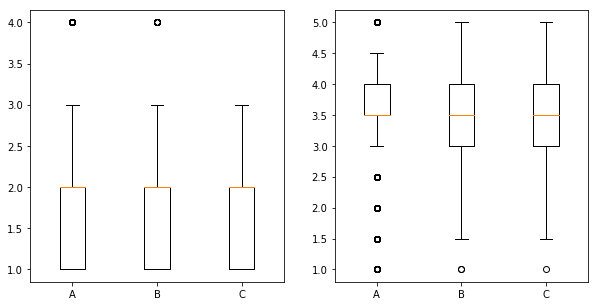

In [62]:
import numpy as np
print(np.mean(price_dict['a']),np.mean(price_dict['b']),np.mean(price_dict['c']))
print(np.mean(rating_dict['a']),np.mean(rating_dict['b']),np.mean(rating_dict['c']))
#####

import matplotlib.pyplot as plt
%matplotlib inline
fig,axes = plt.subplots(1, 2, figsize=(10,5))

data1 = [price_dict['a'],price_dict['b'],price_dict['c']]
labels1 = ['A', 'B', 'C']
plt.subplot(121)
plt.boxplot(data1, labels = labels1)

data2 = [rating_dict['a'],rating_dict['b'],rating_dict['c']]
labels2 = ['A', 'B', 'C']
plt.subplot(122)
plt.boxplot(data2, labels = labels2)
 
plt.plot()

In [65]:
import requests
#get positive/negative words from 
p = 'http://ptrckprry.com/course/ssd/data/positive-words.txt'
n = 'http://ptrckprry.com/course/ssd/data/negative-words.txt'
def get_word(url):
    word_data = requests.get(url).content.decode('latin-1').split('\n')
    return_list = list()
    for i in word_data:
        if (';' in i or i==''):
            pass
        else:
            return_list.append(i)
    return return_list
    
positive_word = get_word(p)
negative_word = get_word(n)

#Then we calculate the positive rate and negative rate here.

def pos_neg_analyzer(text):
    from nltk import word_tokenize
    word = word_tokenize(text)
    neg_count = 0
    pos_count = 0
    pos_list = list()
    neg_list = list()
    
    for i in word:
        if i in positive_word:
            pos_list.append(i)
            pos_count += 1
        if i in negative_word:
            neg_list.append(i)
            neg_count += 1
    
    neg_rate = neg_count/len(word)*100
    pos_rate = pos_count/len(word)*100
    
    return 'positive_rate is {0:1.3f}%,negative_rate is {1:1.3f}%'.format(pos_rate,neg_rate)

print(pos_neg_analyzer(review_dict['a']))
print(pos_neg_analyzer(review_dict['b']))
print(pos_neg_analyzer(review_dict['c']))

positive_rate is 4.771%,negative_rate is 1.471%
positive_rate is 4.564%,negative_rate is 1.484%
positive_rate is 4.386%,negative_rate is 1.513%


In [85]:
clean_review = dict()
from nltk import sent_tokenize
for level,each_level in review_dict.items():
    review_l = ''
    for each_review in sent_tokenize(each_level):
        if ('clean'or'unclean' or 'dirty'or 'fresh' or'preserved' or 'stale') in each_review:
            review_l += each_review
    clean_review.update({level:review_l})
    


In [83]:
def vader_comparison(texts):
    from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
    headers = ['pos','neg','neu','compound']
    print('pos\t','neg\t','neu\t','compound')
    analyzer = SentimentIntensityAnalyzer()
    sentences = sent_tokenize(texts)
    pos=compound=neu=neg=0
    for sentence in sentences:
        vs = analyzer.polarity_scores(sentence)
        pos+=vs['pos']/(len(sentences))
        compound+=vs['compound']/(len(sentences))
        neu+=vs['neu']/(len(sentences))
        neg+=vs['neg']/(len(sentences))
    print('%1.2f\t'%pos,'%1.2f\t'%neg,'%1.2f\t'%neu,'%1.2f\t'%compound)

In [84]:
print(vader_comparison(clean_review['a']))
print(vader_comparison(clean_review['b']))
vader_comparison(clean_review['c'])

pos	 neg	 neu	 compound
0.26	 0.03	 0.71	 0.95	
None
pos	 neg	 neu	 compound
0.23	 0.03	 0.74	 0.77	
None
pos	 neg	 neu	 compound
0.21	 0.14	 0.65	 0.95	


<h4>What did people feel bad about?

In [87]:
#select the negative reviews by adding score
def select_neg_sent(x):
    from nltk.tokenize import sent_tokenize
    neg_sent = dict()
    for each_sent in sent_tokenize(x):
        for neg_word in negative_word:
            if (neg_word in each_sent and each_sent not in neg_sent.keys()):
                neg_sent.update({each_sent:1})
            elif (neg_word in each_sent and each_sent in neg_sent.keys()):
                neg_sent[each_sent] += 1
              
    for each_sent in sent_tokenize(x):        
        for pos_word in positive_word:
            if (pos_word in each_sent and each_sent in neg_sent.keys()):
                neg_sent[each_sent] -= 1
                
    neg_sent_raw = ''
    for key,value in neg_sent.items():
        if value > 0:
            neg_sent_raw += key
    
    return neg_sent_raw.lower()

                
neg_sent_a = select_neg_sent(review_dict['a'])
neg_sent_b = select_neg_sent(review_dict['b'])
neg_sent_c = select_neg_sent(review_dict['c'])
#sorted(neg_sent.items(),key = lambda x: x[1], reverse=True)[:5]

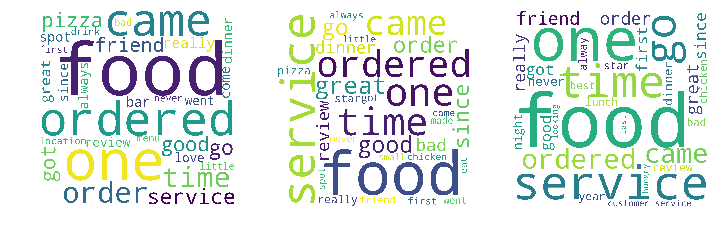

In [98]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
%matplotlib inline
STOPWORDS.add('place')
STOPWORDS.add('restaurant')


fig, axes = plt.subplots(1, 3, figsize=(12,12))

ax = axes[0]
wordcloud = WordCloud(stopwords=STOPWORDS,background_color='white',width=3000,height=3000,max_words=30).generate(neg_sent_a)
ax.imshow(wordcloud)
ax.axis('off')
ax = axes[1]
wordcloud = WordCloud(stopwords=STOPWORDS,background_color='white',width=3000,height=3000,max_words=30).generate(neg_sent_b)
ax.imshow(wordcloud)
ax.axis('off')
ax = axes[2]
wordcloud = WordCloud(stopwords=STOPWORDS,background_color='white',width=3000,height=3000,max_words=30).generate(neg_sent_c)
ax.imshow(wordcloud)
ax.axis('off')

plt.show()

<h1>Data Analysis 

<li>create a map converting "CUISINE" (string) to cuisine categories marked by integers
<li>add a column 'A_or_not', grade A -> 1, grade B/C -> 0

<li>since 91% restaurants receive A and only 9% of them receive B/C, we did undersampling here to adjust the ratio between the different categories represented, now they have the same sample size

In [3]:
import pandas as pd
c_yelp=pd.read_csv("c_yelp.csv")
a_yelp=pd.read_csv("a_yelp.csv",encoding='ISO-8859-1')
b_yelp=pd.read_csv("b_yelp.csv",encoding='ISO-8859-1')
a_yelp['A_or_not']=1
b_yelp['A_or_not']=0
c_yelp['A_or_not']=0

In [4]:
bc_yelp=pd.concat([b_yelp,c_yelp])

In [5]:
a_yelp_resample=a_yelp.sample(n=1310)  

In [6]:
yelp_data=pd.concat([bc_yelp,a_yelp_resample])

<li>our predicting value y is A_or_not (whether the restaurant is graded A or not)

In [7]:
from sklearn.utils import shuffle  
yelp_data = shuffle(yelp_data)

In [11]:
import numpy as np
yelp_data['price_level']=0
yelpnp=np.array(yelp_data)
for i in range(len(yelpnp)):
    yelpnp[i][7]=str(yelpnp[i][2]).count('$')
               
yelp = pd.DataFrame(yelpnp)
yelp.columns=['name','id','price','rating','review_count','review','A_or_not','price_level']

In [28]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(yelp, test_size = 0.3)
x_train = train.iloc[0:,[3,7]]
y_train = train['A_or_not']
x_test = test.iloc[0:,[3,7]]
y_test = test['A_or_not']

In [29]:
from sklearn import linear_model
model = linear_model.LinearRegression()

y_train=y_train.astype(int)
y_test=y_test.astype(int)
model.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [30]:
from sklearn.metrics import mean_squared_error, r2_score
y_pred_training = model.predict(x_train)
y_pred_testing = model.predict(x_test)
training_msq = mean_squared_error(y_pred_training,y_train)
testing_msq = mean_squared_error(y_pred_testing,y_test)
print(training_msq,testing_msq)

0.248075863681 0.252424664038


In [31]:
print('Train R-Square:',r2_score(y_train,y_pred_training))
print('Test R-Square:',r2_score(y_test,y_pred_testing))

Train R-Square: 0.00768592457833
Test R-Square: -0.00975749640166


In [32]:
def confusion_matrix(predicted, actual, threshold):
    if len(predicted) != len(actual): return -1
    tp = 0.0
    fp = 0.0
    tn = 0.0
    fn = 0.0
    for i in range(len(actual)):
        if actual[i] > threshold: #labels that are 1.0  (positive examples)
            if predicted[i] > threshold:
                tp += 1.0 #correctly predicted positive
            else:
                fn += 1.0 #incorrectly predicted negative
        else:              #labels that are 0.0 (negative examples)
            if predicted[i] < threshold:
                tn += 1.0 #correctly predicted negative
            else:
                fp += 1.0 #incorrectly predicted positive
    rtn = [tp, fp, tn, fn]

    return rtn

In [33]:
testing_predictions = y_pred_testing
tp,fp,tn,fn = confusion_matrix(testing_predictions,np.array(y_test),0.5)
print(tp,fp,tn,fn)

218.0 233.0 163.0 172.0


In [34]:
tpr = tp/(tp+fn)
print("Percentage of A restaurants that are correctly identified as A:",tpr)

Percentage of A restaurants that are correctly identified as A: 0.558974358974359


In [35]:
tnr = tn/(tn+fp)
print("Percentage of NOT A restaurants that are correctly identified as NOT A:",tnr)

Percentage of NOT A restaurants that are correctly identified as NOT A: 0.4116161616161616


In [36]:
precision = tp/(tp+fp)
print("Proportion of actual A restaurants amongst all things that are identified as A",precision)

Proportion of actual A restaurants amongst all things that are identified as A 0.48337028824833705


In [37]:
f = precision*tpr/(precision+tpr)
print(f)

0.25921521997621877


In [38]:
accuracy = (tp+tn)/(tp+tn+fp+fn)
print(accuracy)

0.4847328244274809


In [39]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
model2 = tree.DecisionTreeClassifier(max_depth=3)
model2.fit(x_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [40]:
from sklearn.metrics import mean_squared_error, r2_score
y_pred_training2 = model2.predict(x_train)
y_pred_testing2 = model2.predict(x_test)
training_msq2 = mean_squared_error(y_pred_training2,y_train)
testing_msq2 = mean_squared_error(y_pred_testing2,y_test)
print(training_msq2,testing_msq2)

0.446564885496 0.497455470738


In [41]:
print("Training R-Square",model2.score(x_train,y_train))
print("Testing R-Square",model2.score(x_test,y_test))

Training R-Square 0.553435114504
Testing R-Square 0.502544529262


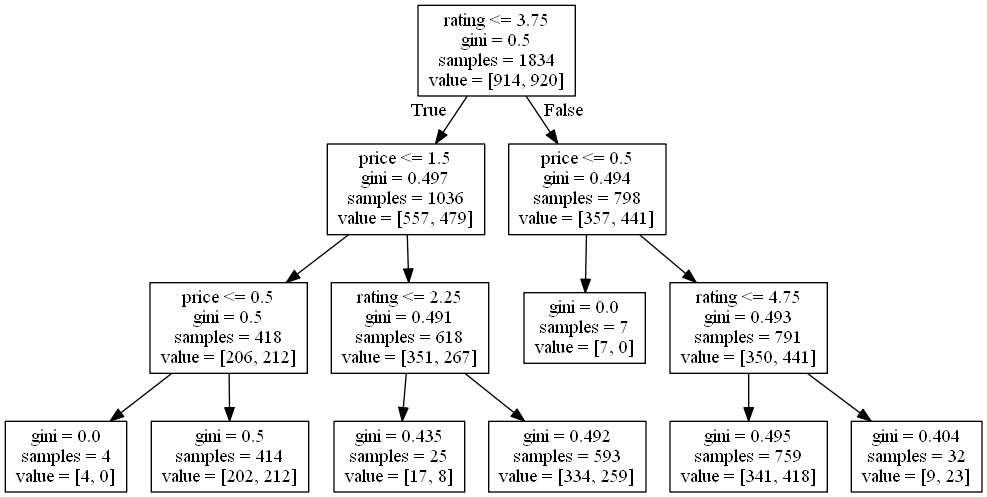

In [42]:
import pydotplus 
from IPython.display import Image
feature_names = ['rating','price']
dot_data = tree.export_graphviz(model2, out_file=None,feature_names=feature_names) 

graph = pydotplus.graphviz.graph_from_dot_data(dot_data)

Image(graph.create_png())
